# Filtering pipeline to extract features

We apply the following filtering steps:
- Use Squidly to predict AS
- Use Chai to dock TPP (unpositional docking)
- Use Vina to do positional docking of TPP

To do AS inference and docking we are using tools from enzyme-tk and therefore also need to be in the enzyme-tk environment. 


In [2]:
# Load data
import os
import pandas as pd

os.chdir('/nvme2/helen/cec_degrader/generalize/')
df = pd.read_pickle('TPPExtremophilePredictions/TPP_extremophile_predictions_EC3p1_hits.pkl')
df = df.head(10)

### Squidly to predict active site residues

In [ ]:
from enzymetk.predict_catalyticsite_step import ActiveSitePred
from enzymetk.save_step import Save
import pandas as pd
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
#os.chdir("/home/helen/enzyme-tk/enzymetk" )

squidly_dir = '/home/helen/enzyme-tk/models/squidly_final_models/'
num_threads = 1
id_col = 'Entry'
seq_col = 'Sequence'

df << (ActiveSitePred(id_col, seq_col, squidly_dir, num_threads) >> Save('/nvme2/helen/masterthesis/filteringpipeline/squidly.pkl'))

In [14]:
# Include results from active site prediction into df
df_squidly = pd.read_pickle('/nvme2/helen/masterthesis/filteringpipeline/squidly.pkl')
df = pd.read_pickle('TPPExtremophilePredictions/TPP_extremophile_predictions_EC3p1_hits.pkl')
df = df.head(10)

df = pd.merge(df, df_squidly, left_on='Entry', right_on='label', how='left')
df.to_pickle('/nvme2/helen/masterthesis/filteringpipeline/extremophiles_squidly.pkl')

### Positional docking with Vina

In [ ]:
# Vina

# Run in docko environment
import sys
#sys.path.append('/home/helen/enzyme-tk')
#sys.path.append('/home/helen/enzyme-tk/enzymetk')
from enzymetk.dock_vina_step import Vina
from enzymetk.save_step import Save
import pandas as pd
import os
#os.environ['MKL_THREADING_LAYER'] = 'GNU'

df = pd.read_pickle('/nvme2/helen/masterthesis/filteringpipeline/extremophiles_squidly.pkl')
df = df.dropna(subset=['Squidly_CR_Position'])

df['substrate_name'] = 'TPP'
df['substrates'] = 'C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3'

output_dir = '/nvme2/helen/masterthesis/filteringpipeline/vina/'
num_threads = 1
id_col = 'Entry'
sequence_col = 'Sequence'
substrate_col = 'substrates'
df['structure'] = None # or path to AF structure
structure_col = 'structure' 
substrate_name_col = 'substrate_name'
active_site_col =  'Squidly_CR_Position' 

df << (Vina(id_col, structure_col, sequence_col, substrate_col, substrate_name_col, active_site_col, f'{output_dir}', num_threads) >> Save(f'{output_dir}vina.pkl'))

### Non-positional docking with Chai

In [10]:
# Make df where substrate is always TPP. Because right now df contains substrate which had highest predicted 
# activity which is in some cases DPP. Because in the end, the desired enzymes need to also catalyze the first step
# this seems to make the most sense. 

# Requires the docko environment to be created
from enzymetk.dock_chai_step import Chai
from enzymetk.save_step import Save
import pandas as pd
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.chdir("/home/helen/enzyme-tk/enzymetk" )

df = pd.read_pickle('/nvme2/helen/masterthesis/filteringpipeline/extremophiles_squidly.pkl')
df.loc[:, 'substrates'] = 'C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3'

output_dir = '/nvme2/helen/masterthesis/filteringpipeline/chai/'
num_threads = 1
id_col = 'Entry'
seq_col = 'Sequence'
substrate_col = 'substrates'

df << (Chai(id_col, seq_col, substrate_col, f'{output_dir}', num_threads) >> Save(f'{output_dir}chai.pkl'))

Q09LX1 MKIGSGEKLLFIGDSITDCGRARPEGEGSFGALGTGYVAYVVGLLQAVYPELGIRVVNKGISGNTVRDLKARWEEDVIAQKPDWVSIMIGINDVWRQYDLPFMKEKHVYLDEYEATLRSLVLETKPLVKGIILMTPFYIEGNEQDPMRRTMDQYGRVVKQIAEETNSLFVDTQAAFNEVLKTLYPAALAWDRVHPSVAGHMILARAFLREIGFEWVRSR C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
/nvme2/helen/masterthesis/filteringpipeline/chai/Q09LX1


Diffusion steps: 100%|██████████| 199/199 [00:36<00:00,  5.42it/s]


Score=0.2773, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q09LX1/chai/pred.model_idx_0.cif
Score=0.2800, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q09LX1/chai/pred.model_idx_1.cif
Score=0.2777, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q09LX1/chai/pred.model_idx_2.cif
Score=0.2794, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q09LX1/chai/pred.model_idx_3.cif
Score=0.2804, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q09LX1/chai/pred.model_idx_4.cif
A1RRK1 MPLLKLVFLGTGGAVPKSDRMLPTIYLEDWLGHRVLLDAGEGAQYRLLQIDVSPASLTLVAITHQHEDHTLGLPGLVITNKFLGGKLKVLAPRSMHKILERLGVEVSDSYEEGRFKITCVEVCHTVDACGWLFQWDVGYKLDLSKVAGLPKWALTNLIRGEAVKVGGRLITPEEVADLTHKRFRRLLYTGDTAPCPQMWKTVGEVDVLIHEATFADDVEPQKAHDEGHSTVADAVEAAKTLKADVLILTHISARYPSKERHKALADAVKPPPHIYIPDDFDTLLIKL C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
/nvme2/helen/masterthesis/filteringpipeline

Diffusion steps: 100%|██████████| 199/199 [01:01<00:00,  3.26it/s]


Score=0.2494, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/A1RRK1/chai/pred.model_idx_0.cif
Score=0.2512, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/A1RRK1/chai/pred.model_idx_1.cif
Score=0.2482, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/A1RRK1/chai/pred.model_idx_2.cif
Score=0.2485, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/A1RRK1/chai/pred.model_idx_3.cif
Score=0.2813, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/A1RRK1/chai/pred.model_idx_4.cif
Q976X8 MDLQNILENNDRVFKFLEVKILDVKPGYSKIQIPYKEEFCRRGNVLNGGIIMTAIDFAGGLATLSVNDGIDQVTQELKVNFLEPMYKGPFTVEGKVVRKGRTAVIVQIEFRDSEGKLGAIALGTWYIIRDRVVKKEGG C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
/nvme2/helen/masterthesis/filteringpipeline/chai/Q976X8


/home/helen/miniconda3/envs/docko/lib/python3.10/site-packages/torch/nn/modules/module.py:1541: UserWarning: Strategy changed mid-invocation, NYI (Triggered internally at ../torch/csrc/jit/runtime/profiling_graph_executor_impl.cpp:416.)
  return forward_call(*args, **kwargs)
Diffusion steps: 100%|██████████| 199/199 [00:36<00:00,  5.42it/s]


Score=0.3227, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q976X8/chai/pred.model_idx_0.cif
Score=0.3273, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q976X8/chai/pred.model_idx_1.cif
Score=0.3251, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q976X8/chai/pred.model_idx_2.cif
Score=0.3266, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q976X8/chai/pred.model_idx_3.cif
Score=0.3283, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q976X8/chai/pred.model_idx_4.cif
A4WKM8 MPLLKLVFLGTGGAVPRADRMLPAIYLEDWLGHRILLDAGEGVQYRLFQIGVAPSSLTLVAVTHMHEDHVLGLPGLVITAKFLGGKVKLLGPRSAHGILSRLGVDVADGYDGGRLRVRCVEVCHTVDACGWLLEWDVGYKLDLKKVEGLPKWALTKLIRGEEVEVGGRVIRPEEVADPAHKRYRRLLYTGDTGPCPRMLKTVGEVDVLIHEATFADDVDPNKAHEEGHSTVADAVEAAKALRAGVLVLTHISARYTDKARHRQLAGRVPPPPHVYVPDDFDTLLVQL C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
/nvme2/helen/masterthesis/filteringpipeline

Diffusion steps: 100%|██████████| 199/199 [01:01<00:00,  3.26it/s]


Score=0.2845, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/A4WKM8/chai/pred.model_idx_0.cif
Score=0.2723, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/A4WKM8/chai/pred.model_idx_1.cif
Score=0.2672, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/A4WKM8/chai/pred.model_idx_2.cif
Score=0.2812, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/A4WKM8/chai/pred.model_idx_3.cif
Score=0.2892, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/A4WKM8/chai/pred.model_idx_4.cif
Q97WW0 MIKPCAYEKQGLIDHAIGSYRVLDGKISESYYKIISRRLERYGIVLDLNGVKEMVKDVVVLHDMGKAGEYYQNQFDDNCNPLKSNFSFIYHELGSALFFYYDYEPIDVEKAEEVKSLLTLAVLNHLNAIRVISDYLVNKFPDNFDERMIKLNKYGSIMLQNLRGVISKSLKVRDYTFDDYHDMLYAFSKKSDKYLKLYNLFLAPIMLGDNLDSSLVRNNGSKTGFVRILEGELNGGSTL C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
/nvme2/helen/masterthesis/filteringpipeline/chai/Q97WW0


/home/helen/miniconda3/envs/docko/lib/python3.10/site-packages/torch/nn/modules/module.py:1541: UserWarning: Strategy changed mid-invocation, NYI (Triggered internally at ../torch/csrc/jit/runtime/profiling_graph_executor_impl.cpp:416.)
  return forward_call(*args, **kwargs)
Diffusion steps: 100%|██████████| 199/199 [01:00<00:00,  3.27it/s]


Score=0.2892, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q97WW0/chai/pred.model_idx_0.cif
Score=0.2904, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q97WW0/chai/pred.model_idx_1.cif
Score=0.2888, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q97WW0/chai/pred.model_idx_2.cif
Score=0.2870, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q97WW0/chai/pred.model_idx_3.cif
Score=0.2832, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q97WW0/chai/pred.model_idx_4.cif
Q97YR6 MKNKNLFPMLSVSEVNELLKQEEIFNFIGIEFEKLEKGYSRLKFNFNEKLTRIGGILHGGVVFSAVDYAGSYAVRTLDKVKDGVTAELKINFLKPMKEGPFTVEPRVISEGKRLVVVDISAYDGNSNLCAKALGTWVVYRETNSETQLSS C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
/nvme2/helen/masterthesis/filteringpipeline/chai/Q97YR6


/home/helen/miniconda3/envs/docko/lib/python3.10/site-packages/torch/nn/modules/module.py:1541: UserWarning: Strategy changed mid-invocation, NYI (Triggered internally at ../torch/csrc/jit/runtime/profiling_graph_executor_impl.cpp:416.)
  return forward_call(*args, **kwargs)
Diffusion steps: 100%|██████████| 199/199 [00:36<00:00,  5.41it/s]


Score=0.2497, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q97YR6/chai/pred.model_idx_0.cif
Score=0.2954, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q97YR6/chai/pred.model_idx_1.cif
Score=0.2512, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q97YR6/chai/pred.model_idx_2.cif
Score=0.2515, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q97YR6/chai/pred.model_idx_3.cif
Score=0.2496, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/Q97YR6/chai/pred.model_idx_4.cif
C3N554 MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMNNKLGINSIKIIGITHMHGDHVFGLLGVIASMGLLDRKETLYILGPRDLKDFLYTSFEYSKFNPSFKIEFIDNYNDQNITIATFKTCHTVESQGYLISERDRVKIDEEKLEKEKIKDWRVMRKLKEGKTVEYNGKFLKPEDYLVIKRGLKVAYTGDTIPCQSVIESVKGVDLLIHDSTFLNEPSACTYGHSNVADAAKVALEASVKLLALTHISPRYEDVTEHLKVARRIFPKSILPDDLSYITLK C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
/nvme2/helen/masterthesis/filteringpipe

/home/helen/miniconda3/envs/docko/lib/python3.10/site-packages/torch/nn/modules/module.py:1541: UserWarning: Strategy changed mid-invocation, NYI (Triggered internally at ../torch/csrc/jit/runtime/profiling_graph_executor_impl.cpp:416.)
  return forward_call(*args, **kwargs)
Diffusion steps: 100%|██████████| 199/199 [01:01<00:00,  3.26it/s]


Score=0.2865, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C3N554/chai/pred.model_idx_0.cif
Score=0.2828, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C3N554/chai/pred.model_idx_1.cif
Score=0.2829, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C3N554/chai/pred.model_idx_2.cif
Score=0.2868, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C3N554/chai/pred.model_idx_3.cif
Score=0.2821, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C3N554/chai/pred.model_idx_4.cif
C4KGQ7 MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMNNKLGINSIKIIGITHMHGDHVFGLLGVIASMGLLDRKETLYILGPRDLKDFLYTSFEYSKFNPSFKIEFIDNYNDQNITIATFKTCHTVESQGYLISERDRVKIDEEKLEKEKIKDWRVMRKLKEGKTVEYNGKFLKPEDYLVIKRGLKVAYTGDTIPCQSVIESVKGVDLLIHDSTFLNEPSACTYGHSNVADAAKVALEASVKLLALTHISPRYEDVTEHLKVARRIFPKSILPDDLSYITLK C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
/nvme2/helen/masterthesis/filteringpipe

/home/helen/miniconda3/envs/docko/lib/python3.10/site-packages/torch/nn/modules/module.py:1541: UserWarning: Strategy changed mid-invocation, NYI (Triggered internally at ../torch/csrc/jit/runtime/profiling_graph_executor_impl.cpp:416.)
  return forward_call(*args, **kwargs)
Diffusion steps: 100%|██████████| 199/199 [01:01<00:00,  3.26it/s]


Score=0.2868, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C4KGQ7/chai/pred.model_idx_0.cif
Score=0.2827, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C4KGQ7/chai/pred.model_idx_1.cif
Score=0.2833, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C4KGQ7/chai/pred.model_idx_2.cif
Score=0.2866, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C4KGQ7/chai/pred.model_idx_3.cif
Score=0.2827, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C4KGQ7/chai/pred.model_idx_4.cif
C3MYG0 MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMNNKLGINSIKIIGITHMHGDHVFGLLGVIASMGLLDRKETLYILGPRDLKDFLYTSFEYSKFNPSFKIEFIDNYNDQNITIATFKTCHTVESQGYLISERDRVKIDEEKLEKEKIKDWRVMRKLKEGKTVEYNGKFLKPEDYLVIKRGLKVAYTGDTIPCQSVIESVKGVDLLIHDSTFLNEPSACTYGHSNVADAAKVALEASVKLLALTHISPRYEDVTEHLKVARRIFPKSILPDDLSYITLK C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
/nvme2/helen/masterthesis/filteringpipe

Diffusion steps: 100%|██████████| 199/199 [01:01<00:00,  3.25it/s]


Score=0.2866, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C3MYG0/chai/pred.model_idx_0.cif
Score=0.2807, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C3MYG0/chai/pred.model_idx_1.cif
Score=0.2833, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C3MYG0/chai/pred.model_idx_2.cif
Score=0.2867, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C3MYG0/chai/pred.model_idx_3.cif
Score=0.2850, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/C3MYG0/chai/pred.model_idx_4.cif
P95862 MEKEIFYDSDGAKIRAFLATPENPKLAVIVIHEIWGLNDNIKDISRRLANEGYMALAPQLYTRNEDVLNEGNIQNVMMKVWSIPPEKRNDPNSYQQIMSALDEKGKKVAELLVLNRQKTEEQMIKDAIKAYEYVSSQGVKKIVSMGFCMGGGLAFQLATEVPLDGTIVFYGRNPQPLEAIQKIKGPILGLYAGEDPPIDAGLPDLISAIIKYKKDLELKIYPGAYHAFFNDRGRSYNKEAAEDAWERVKSFLRRVSK C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3
/nvme2/helen/masterthesis/filteringpipeline/chai/P95862


Diffusion steps: 100%|██████████| 199/199 [01:01<00:00,  3.25it/s]


Score=0.3864, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/P95862/chai/pred.model_idx_0.cif
Score=0.4054, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/P95862/chai/pred.model_idx_1.cif
Score=0.3914, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/P95862/chai/pred.model_idx_2.cif
Score=0.3930, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/P95862/chai/pred.model_idx_3.cif
Score=0.4113, writing output to /nvme2/helen/masterthesis/filteringpipeline/chai/P95862/chai/pred.model_idx_4.cif


,id,Unnamed: 0,Entry,Sequence,EC number,Residue_0index,Residue_1index,active_site_residue_counts,Polarity,temperature,...,products_TPSA,products_MolLogP,products_MaxPartialCharge,products_MinPartialCharge,EC_prefix,label,Squidly_CR_Position,Squidly_CR_probabilities,Squidly_CR_representations,output_dir
0,30272_TPP->Pi+PhOH,30272,Q09LX1,MKIGSGEKLLFIGDSITDCGRARPEGEGSFGALGTGYVAYVVGLLQ...,3.1.1.72,14|190|193,15|191|194,3,0.333333,55.0,...,97.99,0.4636,0.581549,-0.248778,3.1,Q09LX1,14|190|193,0.9961294|0.99725205|0.9981871,"[[-0.47430003, -0.17991376, -0.5839514, -0.579...",/nvme2/helen/masterthesis/filteringpipeline/ch...
1,328798_PP->Pi+PhOH,328798,A1RRK1,MPLLKLVFLGTGGAVPKSDRMLPTIYLEDWLGHRVLLDAGEGAQYR...,3.1.26.11,67,68,1,0.000000,95.0,...,97.99,0.4636,0.581549,-0.248778,3.1,A1RRK1,67|249,0.990516|0.9036957,"[[-0.38198644, -0.14184614, -0.4678861, -0.463...",/nvme2/helen/masterthesis/filteringpipeline/ch...
2,570589_TPP->Pi+PhOH,570589,Q976X8,MDLQNILENNDRVFKFLEVKILDVKPGYSKIQIPYKEEFCRRGNVL...,3.1.2.-,NaN,NaN,0,0.000000,75.0,...,97.99,0.4636,0.581549,-0.248778,3.1,Q976X8,47|55,0.8905089|0.51471406,"[[-0.23930705, -0.09020554, -0.29317582, -0.29...",/nvme2/helen/masterthesis/filteringpipeline/ch...
3,339627_PP->Pi+PhOH,339627,A4WKM8,MPLLKLVFLGTGGAVPRADRMLPAIYLEDWLGHRILLDAGEGVQYR...,3.1.26.11,67,68,1,0.000000,95.0,...,97.99,0.4636,0.581549,-0.248778,3.1,A4WKM8,67|249,0.9965429|0.85879,"[[-0.47460586, -0.17746697, -0.5818856, -0.576...",/nvme2/helen/masterthesis/filteringpipeline/ch...
4,308377_PP->Pi+PhOH,308377,Q97WW0,MIKPCAYEKQGLIDHAIGSYRVLDGKISESYYKIISRRLERYGIVL...,3.1.-.-,NaN,NaN,0,0.000000,74.0,...,97.99,0.4636,0.581549,-0.248778,3.1,Q97WW0,62|65|90|208,0.99745995|0.99151707|0.99707437|0.99868494,"[[-0.6190844, -0.23560312, -0.7581722, -0.7512...",/nvme2/helen/masterthesis/filteringpipeline/ch...
5,570667_TPP->Pi+PhOH,570667,Q97YR6,MKNKNLFPMLSVSEVNELLKQEEIFNFIGIEFEKLEKGYSRLKFNF...,3.1.2.-,NaN,NaN,0,0.000000,74.0,...,97.99,0.4636,0.581549,-0.248778,3.1,Q97YR6,58,0.86180097,"[[-0.23912245, -0.08961665, -0.28707123, -0.28...",/nvme2/helen/masterthesis/filteringpipeline/ch...
6,403421_DPP->Pi+PhOH,403421,C3N554,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,97.99,0.4636,0.581549,-0.248778,3.1,C3N554,64|256,0.9988182|0.6420172,"[[-0.628824, -0.23732626, -0.7743009, -0.76511...",/nvme2/helen/masterthesis/filteringpipeline/ch...
7,404370_DPP->Pi+PhOH,404370,C4KGQ7,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,97.99,0.4636,0.581549,-0.248778,3.1,C4KGQ7,64|256,0.9988182|0.6420172,"[[-0.628824, -0.23732626, -0.7743009, -0.76511...",/nvme2/helen/masterthesis/filteringpipeline/ch...
8,403362_DPP->Pi+PhOH,403362,C3MYG0,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,97.99,0.4636,0.581549,-0.248778,3.1,C3MYG0,64|256,0.9988182|0.6420172,"[[-0.628824, -0.23732626, -0.7743009, -0.76511...",/nvme2/helen/masterthesis/filteringpipeline/ch...
9,439791_TPP->Pi+PhOH,439791,P95862,MEKEIFYDSDGAKIRAFLATPENPKLAVIVIHEIWGLNDNIKDISR...,3.1.1.45,147|194|225,148|195|226,3,0.333333,74.0,...,97.99,0.4636,0.581549,-0.248778,3.1,P95862,32|147|169|194|225,0.99112004|0.99956816|0.99816173|0.87351704|0....,"[[-0.39238006, -0.14593717, -0.48117808, -0.47...",/nvme2/helen/masterthesis/filteringpipeline/ch...


### Get AF3 structures

In [ ]:
# AF3

# Got structures from AFDatabase until get AF3 structures from lucas.
import pandas as pd
import json
import os

df = pd.read_pickle('/nvme2/helen/masterthesis/filteringpipeline/chai.pkl')
df = df.head(10)

template = {
    "log_path": "/disk2/lukas/EnzymeOracle/data/af3/helen/af3_logging.txt",
    "af_input": "/disk2/lukas/EnzymeOracle/data/af3/helen/input",
    "af_output": "/disk2/lukas/EnzymeOracle/data/af3/helen/output",
    "MSA_tmp": "/disk2/lukas/EnzymeOracle/data/af3/helen/tmp",
    "device": 1,
    "ligand_smiles": "C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3",
    "cofactor_smiles": "",
    "targetDB": "/disk2/lukas/af3_mmseqs_scripts/dummy/DB_GPU/uniref90_conv",
    "mmseqs2_sensitivity": 1,
    "n_alignments": 100000
}

# Output directory
output_dir = "AF3"
os.makedirs(output_dir, exist_ok=True)

# Generate one JSON file per entry
for idx, row in df.iterrows():
    json_data = template.copy()
    json_data["protname"] = row["Entry"].upper().replace(" ", "")
    json_data["sequence"] = row["Sequence"]

    output_path = os.path.join(output_dir, f"{json_data['protname']}.json")
    with open(output_path, "w") as f:
        json.dump(json_data, f, indent=4)

### Placer

In [5]:
# PLACER

# Run in placer_env environment
import os
os.chdir('/nvme2/helen/masterthesis')
from steps.PLACER_forVina_step import PLACER
from steps.cleanPDB_step import CleanPDB
from steps.save_step import Save
import pandas as pd
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Prepare pdb files (when running Placer with Chai files)
#df = pd.read_pickle('/nvme2/helen/masterthesis/filteringpipeline/chai.pkl')
#input_col = 'chai_dir'
#output_dir = 'FilteringPipeline/ScreenedVariants/CleanPDB'

#df << (CleanPDB(input_col, output_dir, num_threads = 1) >> Save(f'{output_dir}_screened_variants.pkl'))

df = pd.read_pickle('/nvme2/helen/masterthesis/filteringpipeline/vina.pkl')
df = df.rename(columns={'output_dir': 'vina_dir'})
input_col = 'vina_dir'
output_dir = '/nvme2/helen/masterthesis/filteringpipeline/placer'

df << (PLACER(input_col, output_dir, ligand_name= 'TPP', predict_ligand = 'L-LIG-1', num_threads = 1, nsamples = 10) >> Save(f'{output_dir}.pkl'))

,id,Unnamed: 0,Entry,Sequence,EC number,Residue_0index,Residue_1index,active_site_residue_counts,Polarity,temperature,...,products_MinPartialCharge,EC_prefix,label,Squidly_CR_Position,Squidly_CR_probabilities,Squidly_CR_representations,substrate_name,structure,vina_dir,placer_dir
0,30272_TPP->Pi+PhOH,30272,Q09LX1,MKIGSGEKLLFIGDSITDCGRARPEGEGSFGALGTGYVAYVVGLLQ...,3.1.1.72,14|190|193,15|191|194,3,0.333333,55.0,...,-0.248778,3.1,Q09LX1,14|190|193,0.9961294|0.99725205|0.9981871,"[[-0.47430003, -0.17991376, -0.5839514, -0.579...",TPP,None,/nvme2/helen/masterthesis/filteringpipeline/vi...,[/nvme2/helen/masterthesis/filteringpipeline/p...
1,328798_PP->Pi+PhOH,328798,A1RRK1,MPLLKLVFLGTGGAVPKSDRMLPTIYLEDWLGHRVLLDAGEGAQYR...,3.1.26.11,67,68,1,0.000000,95.0,...,-0.248778,3.1,A1RRK1,67|249,0.990516|0.9036957,"[[-0.38198644, -0.14184614, -0.4678861, -0.463...",TPP,None,/nvme2/helen/masterthesis/filteringpipeline/vi...,[/nvme2/helen/masterthesis/filteringpipeline/p...
2,570589_TPP->Pi+PhOH,570589,Q976X8,MDLQNILENNDRVFKFLEVKILDVKPGYSKIQIPYKEEFCRRGNVL...,3.1.2.-,NaN,NaN,0,0.000000,75.0,...,-0.248778,3.1,Q976X8,47|55,0.8905089|0.51471406,"[[-0.23930705, -0.09020554, -0.29317582, -0.29...",TPP,None,/nvme2/helen/masterthesis/filteringpipeline/vi...,[/nvme2/helen/masterthesis/filteringpipeline/p...
3,339627_PP->Pi+PhOH,339627,A4WKM8,MPLLKLVFLGTGGAVPRADRMLPAIYLEDWLGHRILLDAGEGVQYR...,3.1.26.11,67,68,1,0.000000,95.0,...,-0.248778,3.1,A4WKM8,67|249,0.9965429|0.85879,"[[-0.47460586, -0.17746697, -0.5818856, -0.576...",TPP,None,/nvme2/helen/masterthesis/filteringpipeline/vi...,[/nvme2/helen/masterthesis/filteringpipeline/p...
4,308377_PP->Pi+PhOH,308377,Q97WW0,MIKPCAYEKQGLIDHAIGSYRVLDGKISESYYKIISRRLERYGIVL...,3.1.-.-,NaN,NaN,0,0.000000,74.0,...,-0.248778,3.1,Q97WW0,62|65|90|208,0.99745995|0.99151707|0.99707437|0.99868494,"[[-0.6190844, -0.23560312, -0.7581722, -0.7512...",TPP,None,/nvme2/helen/masterthesis/filteringpipeline/vi...,[/nvme2/helen/masterthesis/filteringpipeline/p...
5,570667_TPP->Pi+PhOH,570667,Q97YR6,MKNKNLFPMLSVSEVNELLKQEEIFNFIGIEFEKLEKGYSRLKFNF...,3.1.2.-,NaN,NaN,0,0.000000,74.0,...,-0.248778,3.1,Q97YR6,58,0.86180097,"[[-0.23912245, -0.08961665, -0.28707123, -0.28...",TPP,None,/nvme2/helen/masterthesis/filteringpipeline/vi...,[/nvme2/helen/masterthesis/filteringpipeline/p...
6,403421_DPP->Pi+PhOH,403421,C3N554,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,-0.248778,3.1,C3N554,64|256,0.9988182|0.6420172,"[[-0.628824, -0.23732626, -0.7743009, -0.76511...",TPP,None,/nvme2/helen/masterthesis/filteringpipeline/vi...,[/nvme2/helen/masterthesis/filteringpipeline/p...
7,404370_DPP->Pi+PhOH,404370,C4KGQ7,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,-0.248778,3.1,C4KGQ7,64|256,0.9988182|0.6420172,"[[-0.628824, -0.23732626, -0.7743009, -0.76511...",TPP,None,/nvme2/helen/masterthesis/filteringpipeline/vi...,[/nvme2/helen/masterthesis/filteringpipeline/p...
8,403362_DPP->Pi+PhOH,403362,C3MYG0,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,-0.248778,3.1,C3MYG0,64|256,0.9988182|0.6420172,"[[-0.628824, -0.23732626, -0.7743009, -0.76511...",TPP,None,/nvme2/helen/masterthesis/filteringpipeline/vi...,[/nvme2/helen/masterthesis/filteringpipeline/p...
9,439791_TPP->Pi+PhOH,439791,P95862,MEKEIFYDSDGAKIRAFLATPENPKLAVIVIHEIWGLNDNIKDISR...,3.1.1.45,147|194|225,148|195|226,3,0.333333,74.0,...,-0.248778,3.1,P95862,32|147|169|194|225,0.99112004|0.99956816|0.99816173|0.87351704|0....,"[[-0.39238006, -0.14593717, -0.48117808, -0.47...",TPP,None,/nvme2/helen/masterthesis/filteringpipeline/vi...,[/nvme2/helen/masterthesis/filteringpipeline/p...


### Superimpose structures 

In [1]:
# Prepare vina files

# run in enzymetk environment
import os
os.chdir('/nvme2/helen/masterthesis')
from steps.preparevina_step import PrepareVina
from steps.save_step import Save
import pandas as pd

os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Mess because placer_env uses a different version of numpy
#df = pd.read_pickle('/nvme2/helen/masterthesis/filteringpipeline/vina.pkl') # run in placer_env
#df.to_csv('/nvme2/helen/masterthesis/filteringpipeline/vina.csv', index=False) # run in placer_env

df = pd.read_csv('/nvme2/helen/masterthesis/filteringpipeline/vina.csv') # run in enzymetk
df = df.rename(columns={'output_dir': 'vina_dir'})
vina_dir='vina_dir'
output_dir = 'filteringpipeline/preparedfiles'
ligand_name = 'TPP'
df << (PrepareVina(vina_dir, ligand_name,  output_dir) >> Save(f'{output_dir}preparevina.pkl'))


,id,Unnamed: 0,Entry,Sequence,EC number,Residue_0index,Residue_1index,active_site_residue_counts,Polarity,temperature,...,products_MinPartialCharge,EC_prefix,label,Squidly_CR_Position,Squidly_CR_probabilities,Squidly_CR_representations,substrate_name,structure,vina_dir,vina_files_for_superimposition
0,30272_TPP->Pi+PhOH,30272,Q09LX1,MKIGSGEKLLFIGDSITDCGRARPEGEGSFGALGTGYVAYVVGLLQ...,3.1.1.72,14|190|193,15|191|194,3,0.333333,55.0,...,-0.248778,3.1,Q09LX1,14|190|193,0.9961294|0.99725205|0.9981871,[[-0.47430003 -0.17991376 -0.5839514 -0.57939...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/Q09LX1_1_vina...
1,328798_PP->Pi+PhOH,328798,A1RRK1,MPLLKLVFLGTGGAVPKSDRMLPTIYLEDWLGHRVLLDAGEGAQYR...,3.1.26.11,67,68,1,0.000000,95.0,...,-0.248778,3.1,A1RRK1,67|249,0.990516|0.9036957,[[-3.81986439e-01 -1.41846135e-01 -4.67886090e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/A1RRK1_1_vina...
2,570589_TPP->Pi+PhOH,570589,Q976X8,MDLQNILENNDRVFKFLEVKILDVKPGYSKIQIPYKEEFCRRGNVL...,3.1.2.-,NaN,NaN,0,0.000000,75.0,...,-0.248778,3.1,Q976X8,47|55,0.8905089|0.51471406,[[-2.39307046e-01 -9.02055427e-02 -2.93175817e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/Q976X8_1_vina...
3,339627_PP->Pi+PhOH,339627,A4WKM8,MPLLKLVFLGTGGAVPRADRMLPAIYLEDWLGHRILLDAGEGVQYR...,3.1.26.11,67,68,1,0.000000,95.0,...,-0.248778,3.1,A4WKM8,67|249,0.9965429|0.85879,[[-4.74605858e-01 -1.77466974e-01 -5.81885576e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/A4WKM8_1_vina...
4,308377_PP->Pi+PhOH,308377,Q97WW0,MIKPCAYEKQGLIDHAIGSYRVLDGKISESYYKIISRRLERYGIVL...,3.1.-.-,NaN,NaN,0,0.000000,74.0,...,-0.248778,3.1,Q97WW0,62|65|90|208,0.99745995|0.99151707|0.99707437|0.99868494,[[-6.19084418e-01 -2.35603124e-01 -7.58172214e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/Q97WW0_1_vina...
5,570667_TPP->Pi+PhOH,570667,Q97YR6,MKNKNLFPMLSVSEVNELLKQEEIFNFIGIEFEKLEKGYSRLKFNF...,3.1.2.-,NaN,NaN,0,0.000000,74.0,...,-0.248778,3.1,Q97YR6,58,0.86180097,[[-2.39122450e-01 -8.96166489e-02 -2.87071228e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/Q97YR6_1_vina...
6,403421_DPP->Pi+PhOH,403421,C3N554,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,-0.248778,3.1,C3N554,64|256,0.9988182|0.6420172,[[-6.28823996e-01 -2.37326264e-01 -7.74300873e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/C3N554_1_vina...
7,404370_DPP->Pi+PhOH,404370,C4KGQ7,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,-0.248778,3.1,C4KGQ7,64|256,0.9988182|0.6420172,[[-6.28823996e-01 -2.37326264e-01 -7.74300873e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/C4KGQ7_1_vina...
8,403362_DPP->Pi+PhOH,403362,C3MYG0,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,-0.248778,3.1,C3MYG0,64|256,0.9988182|0.6420172,[[-6.28823996e-01 -2.37326264e-01 -7.74300873e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/C3MYG0_1_vina...
9,439791_TPP->Pi+PhOH,439791,P95862,MEKEIFYDSDGAKIRAFLATPENPKLAVIVIHEIWGLNDNIKDISR...,3.1.1.45,147|194|225,148|195|226,3,0.333333,74.0,...,-0.248778,3.1,P95862,32|147|169|194|225,0.99112004|0.99956816|0.99816173|0.87351704|0....,[[-3.92380059e-01 -1.45937175e-01 -4.81178075e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/P95862_1_vina...


In [2]:
# Prepare chai files

# run in enzymetk environment
import os
os.chdir('/nvme2/helen/masterthesis')
from steps.preparechai_step import PrepareChai
from steps.save_step import Save
import pandas as pd

os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Mess because placer_env uses a different version of numpy
#df = pd.read_pickle('/nvme2/helen/masterthesis/filteringpipeline/chai.pkl') # run in placer_env
#df.to_csv('/nvme2/helen/masterthesis/filteringpipeline/chai.csv', index=False) # run in placer_env

df = pd.read_csv('/nvme2/helen/masterthesis/filteringpipeline/chai.csv') # run in enzymetk
df = df.rename(columns={'output_dir': 'chai_dir'})
chai_dir='chai_dir'
output_dir = 'filteringpipeline/preparedfiles/'
ligand_name = 'TPP'
df << (PrepareChai(chai_dir, output_dir) >> Save(f'{output_dir}chai.pkl'))

,id,Unnamed: 0,Entry,Sequence,EC number,Residue_0index,Residue_1index,active_site_residue_counts,Polarity,temperature,...,products_MolLogP,products_MaxPartialCharge,products_MinPartialCharge,EC_prefix,label,Squidly_CR_Position,Squidly_CR_probabilities,Squidly_CR_representations,chai_dir,chai_files_for_superimposition
0,30272_TPP->Pi+PhOH,30272,Q09LX1,MKIGSGEKLLFIGDSITDCGRARPEGEGSFGALGTGYVAYVVGLLQ...,3.1.1.72,14|190|193,15|191|194,3,0.333333,55.0,...,0.4636,0.581549,-0.248778,3.1,Q09LX1,14|190|193,0.9961294|0.99725205|0.9981871,[[-0.47430003 -0.17991376 -0.5839514 -0.57939...,/nvme2/helen/masterthesis/filteringpipeline/ch...,[filteringpipeline/preparedfiles/Q09LX1_3_chai...
1,328798_PP->Pi+PhOH,328798,A1RRK1,MPLLKLVFLGTGGAVPKSDRMLPTIYLEDWLGHRVLLDAGEGAQYR...,3.1.26.11,67,68,1,0.000000,95.0,...,0.4636,0.581549,-0.248778,3.1,A1RRK1,67|249,0.990516|0.9036957,[[-3.81986439e-01 -1.41846135e-01 -4.67886090e...,/nvme2/helen/masterthesis/filteringpipeline/ch...,[filteringpipeline/preparedfiles/A1RRK1_4_chai...
2,570589_TPP->Pi+PhOH,570589,Q976X8,MDLQNILENNDRVFKFLEVKILDVKPGYSKIQIPYKEEFCRRGNVL...,3.1.2.-,NaN,NaN,0,0.000000,75.0,...,0.4636,0.581549,-0.248778,3.1,Q976X8,47|55,0.8905089|0.51471406,[[-2.39307046e-01 -9.02055427e-02 -2.93175817e...,/nvme2/helen/masterthesis/filteringpipeline/ch...,[filteringpipeline/preparedfiles/Q976X8_1_chai...
3,339627_PP->Pi+PhOH,339627,A4WKM8,MPLLKLVFLGTGGAVPRADRMLPAIYLEDWLGHRILLDAGEGVQYR...,3.1.26.11,67,68,1,0.000000,95.0,...,0.4636,0.581549,-0.248778,3.1,A4WKM8,67|249,0.9965429|0.85879,[[-4.74605858e-01 -1.77466974e-01 -5.81885576e...,/nvme2/helen/masterthesis/filteringpipeline/ch...,[filteringpipeline/preparedfiles/A4WKM8_3_chai...
4,308377_PP->Pi+PhOH,308377,Q97WW0,MIKPCAYEKQGLIDHAIGSYRVLDGKISESYYKIISRRLERYGIVL...,3.1.-.-,NaN,NaN,0,0.000000,74.0,...,0.4636,0.581549,-0.248778,3.1,Q97WW0,62|65|90|208,0.99745995|0.99151707|0.99707437|0.99868494,[[-6.19084418e-01 -2.35603124e-01 -7.58172214e...,/nvme2/helen/masterthesis/filteringpipeline/ch...,[filteringpipeline/preparedfiles/Q97WW0_2_chai...
5,570667_TPP->Pi+PhOH,570667,Q97YR6,MKNKNLFPMLSVSEVNELLKQEEIFNFIGIEFEKLEKGYSRLKFNF...,3.1.2.-,NaN,NaN,0,0.000000,74.0,...,0.4636,0.581549,-0.248778,3.1,Q97YR6,58,0.86180097,[[-2.39122450e-01 -8.96166489e-02 -2.87071228e...,/nvme2/helen/masterthesis/filteringpipeline/ch...,[filteringpipeline/preparedfiles/Q97YR6_4_chai...
6,403421_DPP->Pi+PhOH,403421,C3N554,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,0.4636,0.581549,-0.248778,3.1,C3N554,64|256,0.9988182|0.6420172,[[-6.28823996e-01 -2.37326264e-01 -7.74300873e...,/nvme2/helen/masterthesis/filteringpipeline/ch...,[filteringpipeline/preparedfiles/C3N554_3_chai...
7,404370_DPP->Pi+PhOH,404370,C4KGQ7,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,0.4636,0.581549,-0.248778,3.1,C4KGQ7,64|256,0.9988182|0.6420172,[[-6.28823996e-01 -2.37326264e-01 -7.74300873e...,/nvme2/helen/masterthesis/filteringpipeline/ch...,[filteringpipeline/preparedfiles/C4KGQ7_0_chai...
8,403362_DPP->Pi+PhOH,403362,C3MYG0,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,0.4636,0.581549,-0.248778,3.1,C3MYG0,64|256,0.9988182|0.6420172,[[-6.28823996e-01 -2.37326264e-01 -7.74300873e...,/nvme2/helen/masterthesis/filteringpipeline/ch...,[filteringpipeline/preparedfiles/C3MYG0_3_chai...
9,439791_TPP->Pi+PhOH,439791,P95862,MEKEIFYDSDGAKIRAFLATPENPKLAVIVIHEIWGLNDNIKDISR...,3.1.1.45,147|194|225,148|195|226,3,0.333333,74.0,...,0.4636,0.581549,-0.248778,3.1,P95862,32|147|169|194|225,0.99112004|0.99956816|0.99816173|0.87351704|0....,[[-3.92380059e-01 -1.45937175e-01 -4.81178075e...,/nvme2/helen/masterthesis/filteringpipeline/ch...,[filteringpipeline/preparedfiles/P95862_2_chai...


In [ ]:
# Combine prepared vina and chai dataframes
df_chai = pd.read_pickle('filteringpipeline/preparedfilespreparechai.pkl')
df_vina = pd.read_pickle('filteringpipeline/preparedfilespreparevina.pkl')

df_vina_chai = df_vina.copy()
df_vina_chai['chai_files_for_superimposition'] = df_chai['chai_files_for_superimposition']

In [3]:
# Superimpose structures

# run in enzymetk environment
import os
os.chdir('/nvme2/helen/masterthesis')
from steps.superimposestructures_step import SuperimposeStructures
from steps.save_step import Save
import pandas as pd
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Combine prepared vina and chai dataframes
df_chai = pd.read_pickle('filteringpipeline/preparedfilespreparechai.pkl')
df_vina = pd.read_pickle('filteringpipeline/preparedfilespreparevina.pkl')

df_vina_chai = df_vina.copy()
df_vina_chai['chai_files_for_superimposition'] = df_chai['chai_files_for_superimposition']

output_dir = 'filteringpipeline/superimposed/'
structure_1 = 'vina_files_for_superimposition'
structure_2 = 'chai_files_for_superimposition'

df_vina_chai << (SuperimposeStructures(structure_1,  structure_2,  output_dir = output_dir, name1='vina', name2='chai', num_threads = 1)  >> Save(f'{output_dir}/superimposed.pkl'))

,id,Unnamed: 0,Entry,Sequence,EC number,Residue_0index,Residue_1index,active_site_residue_counts,Polarity,temperature,...,label,Squidly_CR_Position,Squidly_CR_probabilities,Squidly_CR_representations,substrate_name,structure,vina_dir,vina_files_for_superimposition,chai_files_for_superimposition,superimposedstructure_dir
0,30272_TPP->Pi+PhOH,30272,Q09LX1,MKIGSGEKLLFIGDSITDCGRARPEGEGSFGALGTGYVAYVVGLLQ...,3.1.1.72,14|190|193,15|191|194,3,0.333333,55.0,...,Q09LX1,14|190|193,0.9961294|0.99725205|0.9981871,[[-0.47430003 -0.17991376 -0.5839514 -0.57939...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/Q09LX1_1_vina...,[filteringpipeline/preparedfiles/Q09LX1_3_chai...,[filteringpipeline/superimposed/Q09LX1/Q09LX1_...
1,328798_PP->Pi+PhOH,328798,A1RRK1,MPLLKLVFLGTGGAVPKSDRMLPTIYLEDWLGHRVLLDAGEGAQYR...,3.1.26.11,67,68,1,0.000000,95.0,...,A1RRK1,67|249,0.990516|0.9036957,[[-3.81986439e-01 -1.41846135e-01 -4.67886090e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/A1RRK1_1_vina...,[filteringpipeline/preparedfiles/A1RRK1_4_chai...,[filteringpipeline/superimposed/A1RRK1/A1RRK1_...
2,570589_TPP->Pi+PhOH,570589,Q976X8,MDLQNILENNDRVFKFLEVKILDVKPGYSKIQIPYKEEFCRRGNVL...,3.1.2.-,NaN,NaN,0,0.000000,75.0,...,Q976X8,47|55,0.8905089|0.51471406,[[-2.39307046e-01 -9.02055427e-02 -2.93175817e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/Q976X8_1_vina...,[filteringpipeline/preparedfiles/Q976X8_1_chai...,[filteringpipeline/superimposed/Q976X8/Q976X8_...
3,339627_PP->Pi+PhOH,339627,A4WKM8,MPLLKLVFLGTGGAVPRADRMLPAIYLEDWLGHRILLDAGEGVQYR...,3.1.26.11,67,68,1,0.000000,95.0,...,A4WKM8,67|249,0.9965429|0.85879,[[-4.74605858e-01 -1.77466974e-01 -5.81885576e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/A4WKM8_1_vina...,[filteringpipeline/preparedfiles/A4WKM8_3_chai...,[filteringpipeline/superimposed/A4WKM8/A4WKM8_...
4,308377_PP->Pi+PhOH,308377,Q97WW0,MIKPCAYEKQGLIDHAIGSYRVLDGKISESYYKIISRRLERYGIVL...,3.1.-.-,NaN,NaN,0,0.000000,74.0,...,Q97WW0,62|65|90|208,0.99745995|0.99151707|0.99707437|0.99868494,[[-6.19084418e-01 -2.35603124e-01 -7.58172214e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/Q97WW0_1_vina...,[filteringpipeline/preparedfiles/Q97WW0_2_chai...,[filteringpipeline/superimposed/Q97WW0/Q97WW0_...
5,570667_TPP->Pi+PhOH,570667,Q97YR6,MKNKNLFPMLSVSEVNELLKQEEIFNFIGIEFEKLEKGYSRLKFNF...,3.1.2.-,NaN,NaN,0,0.000000,74.0,...,Q97YR6,58,0.86180097,[[-2.39122450e-01 -8.96166489e-02 -2.87071228e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/Q97YR6_1_vina...,[filteringpipeline/preparedfiles/Q97YR6_4_chai...,[filteringpipeline/superimposed/Q97YR6/Q97YR6_...
6,403421_DPP->Pi+PhOH,403421,C3N554,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,C3N554,64|256,0.9988182|0.6420172,[[-6.28823996e-01 -2.37326264e-01 -7.74300873e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/C3N554_1_vina...,[filteringpipeline/preparedfiles/C3N554_3_chai...,[filteringpipeline/superimposed/C3N554/C3N554_...
7,404370_DPP->Pi+PhOH,404370,C4KGQ7,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,C4KGQ7,64|256,0.9988182|0.6420172,[[-6.28823996e-01 -2.37326264e-01 -7.74300873e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/C4KGQ7_1_vina...,[filteringpipeline/preparedfiles/C4KGQ7_0_chai...,[filteringpipeline/superimposed/C4KGQ7/C4KGQ7_...
8,403362_DPP->Pi+PhOH,403362,C3MYG0,MIQIFFLGTGAGSPSKKRKLPAFLVRREGLNILLDCGEGTQYTLMN...,3.1.26.11,64,65,1,0.000000,75.0,...,C3MYG0,64|256,0.9988182|0.6420172,[[-6.28823996e-01 -2.37326264e-01 -7.74300873e...,TPP,NaN,/nvme2/helen/masterthesis/filteringpipeline/vi...,[filteringpipeline/preparedfiles/C3MYG0_1_vina...,[filteringpipe

#### Placer superposition

In [ ]:
# Prepare placer df

# Mess because placer_env uses a different version of numpy
#df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Placer_screened_variants.pkl') # run in placer_env
#df.to_csv('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Placer_screened_variants2.csv', index=False) # run in placer_env


In [ ]:
# For placer need to do manual superimposition because otherwise doesn't work

# 1. Get common residues
placer_residues = get_residue_ids(placer_structure)
vina_residues = get_residue_ids(vina_structure)
common_residues = placer_residues & vina_residues

# 2. Select only CA atoms from common residues
placer_ca = placer_structure[(placer_structure.atom_name == "CA") &
                             [rid in common_residues for rid in zip(placer_structure.res_id, placer_structure.ins_code)]]

vina_ca = vina_structure[(vina_structure.atom_name == "CA") &
                         [rid in common_residues for rid in zip(vina_structure.res_id, vina_structure.ins_code)]]

In [1]:
# Ensure same length for alignment
min_len = min(len(placer_ca), len(vina_ca))
placer_ca = placer_ca[:min_len]
vina_ca = vina_ca[:min_len]


# Compute rotation and translation
placer_aligned, _= struc.superimpose(vina_ca, placer_ca)

# Assign unique chain IDs
vina_structure.chain_id[:] = "A"
placer_aligned.chain_id[:] = "B"

# Combine both into one AtomArray
combined = struc.concatenate([vina_structure, placer_aligned])

# Write to PDB
output_filename = Path(output_dir) / f"superimposed_with_placer3.pdb"
pdb_file = pdb.PDBFile()
pdb_file.set_structure(combined)
pdb_file.write(output_filename)


NameError: name 'placer_ca' is not defined

### Calculate ligand RMSD

Processing subdirectory: /nvme2/helen/masterthesis/filteringpipeline/superimposed/Q97WW0
Failed RMSD calculation for pair: /tmp/tmptqdryjfr.pdb, /tmp/tmprv77kqe9.pdb — Mismatched ligand atom count.
Failed RMSD calculation for pair: /tmp/tmp0ozorny_.pdb, /tmp/tmpgw69jojs.pdb — Mismatched ligand atom count.
Failed RMSD calculation for pair: /tmp/tmpuqkfnrx4.pdb, /tmp/tmpiq9v54de.pdb — Mismatched ligand atom count.
Failed RMSD calculation for pair: /tmp/tmpej6uswxr.pdb, /tmp/tmp0xygdy6y.pdb — Mismatched ligand atom count.
Failed RMSD calculation for pair: /tmp/tmpdmc31mnc.pdb, /tmp/tmp1fcnwzud.pdb — Mismatched ligand atom count.
Failed RMSD calculation for pair: /tmp/tmpu6t_8upm.pdb, /tmp/tmp62zv123y.pdb — Mismatched ligand atom count.
Processing subdirectory: /nvme2/helen/masterthesis/filteringpipeline/superimposed/A4WKM8
Processing subdirectory: /nvme2/helen/masterthesis/filteringpipeline/superimposed/C3MYG0
Processing subdirectory: /nvme2/helen/masterthesis/filteringpipeline/superimpos

,Entry,pdb_file,docked_structure1,docked_structure2,tool1,tool2,ligand_rmsd,Squidly_CR_Position
0,Q97WW0,Q97WW0_1_vina__Q97WW0_2_chai.pdb,Q97WW0_1_vina,Q97WW0_2_chai,vina,chai,2.782739,62|65|90|208
1,Q97WW0,Q97WW0_2_chai__Q97WW0_0_chai.pdb,Q97WW0_2_chai,Q97WW0_0_chai,chai,chai,1.316129,62|65|90|208
2,Q97WW0,Q97WW0_1_vina__Q97WW0_0_chai.pdb,Q97WW0_1_vina,Q97WW0_0_chai,vina,chai,2.733620,62|65|90|208
3,Q97WW0,Q97WW0_2_chai__Q97WW0_1_chai.pdb,Q97WW0_2_chai,Q97WW0_1_chai,chai,chai,1.696948,62|65|90|208
4,Q97WW0,Q97WW0_2_chai__Q97WW0_3_chai.pdb,Q97WW0_2_chai,Q97WW0_3_chai,chai,chai,1.538301,62|65|90|208
...,...,...,...,...,...,...,...,...
458,Q976X8,Q976X8_2_vina__Q976X8_2_chai.pdb,Q976X8_2_vina,Q976X8_2_chai,vina,chai,16.364707,47|55
459,Q976X8,Q976X8_1_vina__Q976X8_3_chai.pdb,Q976X8_1_vina,Q976X8_3_chai,vina,chai,14.470096,47|55
460,Q976X8,Q976X8_1_chai__Q976X8_3_chai.pdb,Q976X8_1_chai,Q976X8_3_chai,chai,chai,1.695604,47|55
461,Q976X8,Q976X8_1_chai__Q976X8_0_chai.pdb,Q976X8_1_chai,Q976X8_0_chai,chai,chai,2.660499,47|55


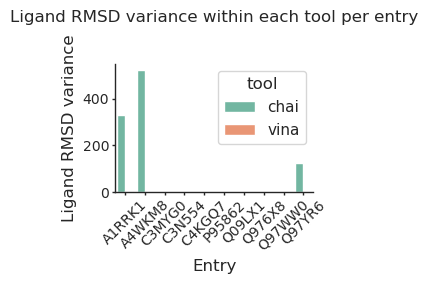

In [1]:
# Calculate LigandRMSD

import os
os.chdir('/nvme2/helen/masterthesis')
from steps.computeligandRMSD_step import LigandRMSD
from steps.save_step import Save
import pandas as pd
import os

os.environ['MKL_THREADING_LAYER'] = 'GNU'

input_dir = '/nvme2/helen/masterthesis/filteringpipeline/superimposed/'
output_dir = 'filteringpipeline/ligandRMSD/'
entry_col = 'Entry'
df = pd.read_pickle(f'{input_dir}superimposed.pkl')
num_threads = 1

df << (LigandRMSD(entry_col, input_dir, output_dir, visualize_heatmaps= True,  num_threads = 1)  >> Save(f'{output_dir}ligandrmsd.pkl'))

### Geometric filtering

In [1]:
# Geometric filtering

import os
os.chdir('/nvme2/helen/masterthesis')
from steps.geometric_filtering import GeometricFiltering
from steps.save_step import Save
import pandas as pd

os.environ['MKL_THREADING_LAYER'] = 'GNU'

df = pd.read_csv('/nvme2/helen/masterthesis/filteringpipeline/ligandRMSD/best_docked_structures.csv')
output_dir = 'filteringpipeline/geometricfiltering/'
preparedfiles_dir = 'filteringpipeline/preparedfiles/'
ligand_smiles = "O=P(OC1=CC=CC=C1)(OC2=CC=CC=C2)OC3=CC=CC=C3"
smarts_pattern = 'P(=O)(O)(O)(O)' # this determines which esterbond is being considered!

df << (GeometricFiltering(ligand_smiles, smarts_pattern, preparedfiles_dir, output_dir)  >> Save(f'{output_dir}geometricfiltering.pkl'))

No squidly residues found in A1RRK1. 
No squidly residues found in A4WKM8. 
No squidly residues found in C3MYG0. 
No squidly residues found in C3N554. 
No squidly residues found in C4KGQ7. 
No squidly residues found in Q976X8. 
No squidly residues found in Q97WW0. 
No squidly residues found in Q97YR6. 


,Entry,best_structure,avg_rmsd,Squidly_CR_Position,squidly_residue,squidly_residue_ester_distance,closest_nuc_residue,clostest_nuc_residue_distance,squidly_is_closest,Bürgi–Dunitz angle to squidly residue,Bürgi–Dunitz angle to closest nucleophile
0,A1RRK1,A1RRK1_3_vina,15.763099,67|249,None,NaN,None,NaN,False,NaN,NaN
1,A4WKM8,A4WKM8_1_vina,13.217598,67|249,None,NaN,None,NaN,False,NaN,NaN
2,C3MYG0,C3MYG0_6_vina,10.979069,64|256,None,NaN,None,NaN,False,NaN,NaN
3,C3N554,C3N554_6_vina,11.143658,64|256,None,NaN,None,NaN,False,NaN,NaN
4,C4KGQ7,C4KGQ7_5_vina,11.104050,64|256,None,NaN,None,NaN,False,NaN,NaN
5,P95862,P95862_2_vina,3.641367,32|147|169|194|225,CYS_148,3.308901,CYS_148,3.308901,True,60.695079,60.695079
6,Q09LX1,Q09LX1_1_chai,11.940004,14|190|193,SER_15,25.196418,SER_196,15.775357,False,110.782556,126.194378
7,Q976X8,Q976X8_0_chai,6.470489,47|55,None,NaN,None,NaN,False,NaN,NaN
8,Q97WW0,Q97WW0_2_chai,1.918309,62|65|90|208,None,NaN,None,NaN,False,NaN,NaN
9,Q97YR6,Q97YR6_1_vina,3.862811,58,None,NaN,None,NaN,False,NaN,NaN


Ask Ariane: 

The ribonucleases apparently often have metal ions to activate water as nucleophile. Have His (2x) and Asp to coordinate 2 Zn atoms and activate water. 
Do we generally want to keep this or filter them out because the squidly predicted residues are not part of catalytic triad?



### Active site properties

In [1]:
import os
os.chdir('/nvme2/helen/masterthesis')
from steps.fpocket_step import Fpocket
from steps.save_step import Save
import pandas as pd
import os

# Run in enzymetk environment
df = pd.read_csv('/nvme2/helen/masterthesis/filteringpipeline/ligandRMSD/best_docked_structures.csv')
output_dir = '/nvme2/helen/masterthesis/filteringpipeline/fpocket/'
preparedfiles_dir = 'filteringpipeline/preparedfiles/'
ligand_smiles = "O=P(OC1=CC=CC=C1)(OC2=CC=CC=C2)OC3=CC=CC=C3"
pdb_col = 'vina_dir'

df << (Fpocket(preparedfiles_dir, output_dir) >> Save(f'{output_dir}Fpocket-test.pkl'))

/nvme2/helen/masterthesis/steps/fpocket_step.py:349: SyntaxWarning: invalid escape sequence '\s'
  match_score = re.search(r"Pocket Score\s+:\s+([\d.]+)", line)
Existing fpocket output for A1RRK1_3_vina found at /nvme2/helen/masterthesis/filteringpipeline/fpocket/A1RRK1_3_vina_fpocket_output. Removing old fpocket output.
Existing fpocket output for A4WKM8_1_vina found at /nvme2/helen/masterthesis/filteringpipeline/fpocket/A4WKM8_1_vina_fpocket_output. Removing old fpocket output.
Existing fpocket output for C3MYG0_6_vina found at /nvme2/helen/masterthesis/filteringpipeline/fpocket/C3MYG0_6_vina_fpocket_output. Removing old fpocket output.
Existing fpocket output for C3N554_6_vina found at /nvme2/helen/masterthesis/filteringpipeline/fpocket/C3N554_6_vina_fpocket_output. Removing old fpocket output.
Existing fpocket output for C4KGQ7_5_vina found at /nvme2/helen/masterthesis/filteringpipeline/fpocket/C4KGQ7_5_vina_fpocket_output. Removing old fpocket output.
Existing fpocket output for P

,Entry,best_structure,avg_rmsd,Squidly_CR_Position,fpocket_dir,fpocket_Pocket_Score,fpocket_Drug_Score,fpocket_Num_alpha_spheres,fpocket_Mean_alpha_sphere_radius,fpocket_Mean_alpha_sphere_Solvent_Acc,...,fpocket_Amino_Acid_based_volume_Score,fpocket_Pocket_volume_Monte_Carlo,fpocket_Pocket_volume_convex_hull,fpocket_Charge_Score,fpocket_Local_hydrophobic_density_Score,fpocket_Num_apolar_alpha_sphere,fpocket_Proportion_apolar_alpha_sphere,total_sasa,polar_sasa,apolar_sasa
0,A1RRK1,A1RRK1_3_vina,15.763099,67|249,/nvme2/helen/masterthesis/filteringpipeline/fp...,0.0980,0.0015,39,4.2491,0.5360,...,3.5556,967.2774,230.5344,0,8.4000,10,0.2564,112.140,52.966,59.174
1,A4WKM8,A4WKM8_1_vina,13.217598,67|249,/nvme2/helen/masterthesis/filteringpipeline/fp...,0.3538,0.0021,40,4.1176,0.5064,...,3.2222,718.7026,141.0530,-2,5.6364,11,0.2750,86.278,35.557,50.720
2,C3MYG0,C3MYG0_6_vina,10.979069,64|256,/nvme2/helen/masterthesis/filteringpipeline/fp...,0.0932,0.0259,36,4.5750,0.6046,...,3.8000,807.7171,69.2478,2,14.0000,15,0.4167,86.231,47.587,38.644
3,C3N554,C3N554_6_vina,11.143658,64|256,/nvme2/helen/masterthesis/filteringpipeline/fp...,0.1936,0.0339,36,4.5565,0.6066,...,3.6875,877.2224,98.8377,1,13.1250,16,0.4444,73.652,30.178,43.475
4,C4KGQ7,C4KGQ7_5_vina,11.104050,64|256,/nvme2/helen/masterthesis/filteringpipeline/fp...,0.1139,0.0171,39,4.5435,0.6132,...,3.8000,889.0574,86.0873,2,12.4706,17,0.4359,90.992,48.725,42.267
5,P95862,P95862_2_vina,3.641367,32|147|169|194|225,/nvme2/helen/masterthesis/filteringpipeline/fp...,-0.1776,1.0000,115,4.4392,0.4708,...,4.5200,1718.7158,470.7803,1,55.1000,60,0.5217,229.311,64.123,165.187
6,Q09LX1,Q09LX1_1_chai,11.940004,14|190|193,/nvme2/helen/masterthesis/filteringpipeline/fp...,0.0371,0.0253,25,4.6920,0.6432,...,5.3000,1966.4023,374.0764,2,13.1765,17,0.6800,173.641,35.734,137.907
7,Q976X8,Q976X8_0_chai,6.470489,47|55,/nvme2/helen/masterthesis/filteringpipeline/fp...,0.0917,0.0351,91,4.2377,0.5309,...,4.5000,1447.4828,380.4625,0,20.0769,26,0.2857,148.146,75.688,72.458
8,Q97WW0,Q97WW0_2_chai,1.918309,62|65|90|208,/nvme2/helen/masterthesis/filteringpipeline/fp...,0.1994,0.0352,94,4.1970,0.5370,...,4.1818,1381.6187,413.9366,3,16.6400,25,0.2660,119.210,63.659,55.551
9,Q97YR6,Q97YR6_1_vina,3.862811,58,/nvme2/helen/masterthesis/filteringpipeline/fp...,0.0638,0.0729,51,4.5560,0.6044,...,4.4000,1724.8549,373.5034,3,19.9231,26,0.5098,144.659,45.555,99.105


### PLIP

In [7]:

import os
import pandas as pd
from pathlib import Path
import logging
from multiprocessing.dummy import Pool as ThreadPool
import numpy as np
from steps.step import Step
import subprocess
from concurrent.futures import ProcessPoolExecutor
from glob import glob
from tqdm import tqdm


def checkNgen_folder(folder_path: str) -> str:

    """
    Check if the folder and its subfolder exists
    create a new directory if not
    Args:
    - folder_path: str, the folder path
    """

    # if input path is file
    if bool(os.path.splitext(folder_path)[1]):
        folder_path = os.path.dirname(folder_path)

    split_list = os.path.normpath(folder_path).split("/")
    for p, _ in enumerate(split_list):
        subfolder_path = "/".join(split_list[: p + 1])
        if not os.path.exists(subfolder_path):
            print(f"Making {subfolder_path} ...")
            os.makedirs(subfolder_path, exist_ok=True) 
    return folder_path


def run_plip(pdb_file: str, output_dir: str):
    """
    Runs the PLIP command for a given PDB file and stores the results in the output directory.
    """

    checkNgen_folder(output_dir)

    # Define the log file path
    log_file = Path(output_dir) / "plip.log"

    cmd = [
        "python",
        "-m",
        "plip.plipcmd",
        "-f",
        os.path.abspath(pdb_file),
        "--out",
        os.path.abspath(output_dir),
        "--xml",
    ]

    # Run the command and redirect output to the log file
    try:
        with open(log_file, "w") as log:
            subprocess.run(cmd, check=True, stdout=log, stderr=log)
    except subprocess.CalledProcessError as e:
        print(f"PLIP execution failed for {pdb_file}. Check logs in {log_file}.")
        print(f"Error: {e}")



def run_lib_plip(
    in_dir: str, out_dir: str = "zs/plip", regen: bool = False, max_workers: int = 64
):

    """
    Get plip report for each of the variant in a given directory

    if  in_dir = 'data/structure'
        out_dir = 'zs/plip'
        will look for structure directly under the folder, i.e.
            data/structure/PfTrpB.pdb
            data/structure/Rma.pdb
        to generate plip results under pdb subdirectory in the out_dir, i.e.
            zs/plip/pdb/PfTrpB/
            zs/plip/pdb/Rma/

    if  in_dir = zs/af3/struct_joint/ParLQ
        out_dir = zs/plip
        will look for structures under the subfolders for each variant, i.e.
            zs/af3/struct_joint/ParLQ/w56e_y57k_l59f_q60d_f89w/w56e_y57k_l59f_q60d_f89w_model.cif
            zs/af3/struct_joint/ParLQ/w56e_y57k_l59f_q60d_f89w/seed-1_sample-0/model.cif
            zs/af3/struct_joint/ParLQ/w56e_y57k_l59f_q60d_f89w/seed-1_sample-1/model.cif
        to first convert cif to pdb and then
        to generate plip results under the out_dir that
        perserve the structure details as well as consolidate and rename the variants and reps, i.e.
            zs/plip/af3/struct_joint/ParLQ/W56E:Y57K:L59F:Q60D:F89W_agg/
            zs/plip/af3/struct_joint/ParLQ/W56E:Y57K:L59F:Q60D:F89W_0/
            zs/plip/af3/struct_joint/ParLQ/W56E:Y57K:L59F:Q60D:F89W_1/

    if  in_dir = zs/chai/struct_joint/ParLQ
        out_dir = zs/plip
        will look for structures under the subfolders for each variant, i.e.
            zs/chai/struct_joint/ParLQ/W56A:Y57C:L59S:Q60E:F89G/W56A:Y57C:L59S:Q60E:F89G_0.cif
            zs/chai/struct_joint/ParLQ/W56A:Y57C:L59S:Q60E:F89G/W56A:Y57C:L59S:Q60E:F89G_1.cif
        to first convert cif to pdb and then
        to generate plip results under the out_dir that
        perserve the structure details, i.e.
            zs/plip/chai/struct_joint/ParLQ/W56A:Y57C:L59S:Q60E:F89G_0/
            zs/plip/chai/struct_joint/ParLQ/W56A:Y57C:L59S:Q60E:F89G_1/
    """

    in_dir = os.path.normpath(in_dir)
    out_dir = checkNgen_folder(out_dir)

    in_dir = os.path.normpath(in_dir)
    out_dir = checkNgen_folder(out_dir)

    tasks = []

    if os.path.basename(in_dir) == "structure":
        # Case 1: Directly under the folder
        for file in sorted(glob(f"{in_dir}/*.pdb")):
            variant_name = get_file_name(file)
            var_out_dir = checkNgen_folder(
                os.path.join(out_dir, "pdb", "struct", variant_name)
            )
            tasks.append((file, var_out_dir, variant_name, regen))

    elif "af3" in in_dir:
        agg_cif_files = glob(f"{in_dir}/*/*_model.cif")
        rep_cif_files = glob(f"{in_dir}/*/*/model.cif")

        # Case 2: Nested folders with CIF files
        for cif_file in sorted(agg_cif_files + rep_cif_files):
            lib_name = os.path.basename(in_dir)
            struct_dets = in_dir.split("af3/")[-1].split(f"/{lib_name}")[0]

            lib_out_dir = checkNgen_folder(
                os.path.join(out_dir, "af3", struct_dets, lib_name)
            )
            variant_path = Path(cif_file).relative_to(Path(in_dir))
            variant_name = variant_path.parts[0].upper().replace("_", ":")

            if "_model.cif" in cif_file:
                rep_name = "agg"
            else:
                rep_name = variant_path.parts[1].split("sample-")[-1]

            var_out_dir = checkNgen_folder(
                os.path.join(lib_out_dir, f"{variant_name}_{rep_name}")
            )
            tasks.append((cif_file, var_out_dir, f"{variant_name}_{rep_name}", regen))

    elif "chai" in in_dir:
        # Case 3: Nested folders with CIF files
        for cif_file in sorted(glob(f"{in_dir}/**/*.cif")):
            lib_name = os.path.basename(in_dir)
            struct_dets = in_dir.split("chai/")[-1].split(f"/{lib_name}")[0]

            lib_out_dir = checkNgen_folder(
                os.path.join(out_dir, "chai", struct_dets, lib_name)
            )

            variant_name = os.path.basename(os.path.dirname(cif_file)).replace(" ", "_")
            var_out_dir = checkNgen_folder(os.path.join(lib_out_dir, variant_name)).replace(" ", "_")
            print(cif_file)
            print(variant_name)
            print(var_out_dir)
            tasks.append((cif_file, var_out_dir, variant_name, regen))

    # Parallelize the tasks using ProcessPoolExecutor
    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        list(tqdm(executor.map(process_task, tasks), total=len(tasks)))




def process_task(task):
    """
    Processes a single task, which includes converting CIF to PDB and running PLIP.
    Args:
        task (tuple): Contains input file, output directory, and regen flag.
    """
    cif_or_pdb_file, var_out_dir, variant_name, regen = task

    var_xml = os.path.join(var_out_dir, "report.xml")

    # Check if output already exists and skip if regen is False
    if not regen and os.path.exists(var_xml):
        print(f"PLIP results for {var_xml} already exist. Skipping...")
        return

    # Prepare the PDB file path
    pdb_file = os.path.join(var_out_dir, f"{variant_name}.pdb")

    # Convert CIF to PDB if necessary
    # if cif_or_pdb_file.endswith(".cif"):
    # obabel input.cif -O output.pdb clean up the cif file
    cmd = f"obabel {cif_or_pdb_file} -O {pdb_file} --remove HOH"
    subprocess.run(cmd, shell=True)

    # else:
    #     # Copy PDB directly
    #     checkNgen_folder(var_out_dir)
    #     os.system(f"cp {cif_or_pdb_file} {pdb_file}")

    # Run PLIP
    run_plip(pdb_file=pdb_file, output_dir=var_out_dir)


def process_task(task):
    pdb_file, var_out_dir = task
    run_plip(pdb_file, var_out_dir)

# Energy estimation functions
def estimate_hydrophobic_energy(distance):
    return -0.17 * (4 - distance) if distance < 4 else 0


def estimate_hydrogen_bond_energy(distance, donor_angle):
    return -1.5 * (2.5 - distance) * (donor_angle / 180) if distance < 2.5 else 0


def estimate_salt_bridge_energy(distance):
    return -2.0 * (4 - distance) if distance < 4 else 0


def estimate_metal_complex_energy(distance):
    return -5.0 * (2.5 - distance) if distance < 2.5 else 0


def estimate_water_bridge_energy(distance, donor_angle):
    return -1.0 * (2.8 - distance) * (donor_angle / 180) if distance < 2.8 else 0


def estimate_pi_stack_energy(distance):
    return -2.5 * (5 - distance) if distance < 5 else 0


def estimate_pi_cation_energy(distance):
    return -3.5 * (4 - distance) if distance < 4 else 0


def estimate_halogen_bond_energy(distance):
    return -1.5 * (3.5 - distance) if distance < 3.5 else 0


# Mapping dictionary
PLIP_INTERACTION_MAP = {
    "hydrophobic": ("hydrophobic_interaction", "dist", estimate_hydrophobic_energy),
    "hydrogen_bond": (
        "hydrogen_bond",
        "dist_d-a",
        estimate_hydrogen_bond_energy,
        "don_angle",
    ),
    "salt_bridge": ("salt_bridge", "dist", estimate_salt_bridge_energy),
    "metal_complex": ("metal_complex", "dist", estimate_metal_complex_energy),
    "water_bridge": (
        "water_bridge",
        "dist_d-a",
        estimate_water_bridge_energy,
        "don_angle",
    ),
    "pi_stack": ("pi_stack", "centdist", estimate_pi_stack_energy),
    "pi_cation": ("pi_cation_interaction", "dist", estimate_pi_cation_energy),
    "halogen_bond": ("halogen_bond", "dist", estimate_halogen_bond_energy),
}


# Parse PLIP XML Report
def parse_plip_report(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    interactions = {key: [] for key in PLIP_INTERACTION_MAP}

    for key, (tag, dist_key, func, *extra_keys) in PLIP_INTERACTION_MAP.items():
        for interaction in root.findall(f".//{tag}"):
            distance = float(interaction.find(dist_key).text)
            if extra_keys:
                extra_value = float(interaction.find(extra_keys[0]).text)
                interactions[key].append(func(distance, extra_value))
            else:
                interactions[key].append(func(distance))

    return interactions


# Calculate total stabilization energy
def calculate_total_energy(interactions):
    total_energy = sum(sum(values) for values in interactions.values())
    return total_energy


def run_plip_on_pdb_dir(pdb_input_dir: str, plip_output_dir: str, max_workers: int = 4):
    """
    Runs PLIP on all .pdb files in a given directory using parallel processing.
    """
    pdb_input_dir = os.path.abspath(pdb_input_dir)
    plip_output_dir = checkNgen_folder(os.path.abspath(plip_output_dir))

    tasks = []

    for pdb_file in sorted(glob(f"{pdb_input_dir}/*.pdb")):
        variant_name = Path(pdb_file).stem
        var_out_dir = checkNgen_folder(os.path.join(plip_output_dir, variant_name))
        tasks.append((pdb_file, var_out_dir))

    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        list(tqdm(executor.map(process_task, tasks), total=len(tasks)))

    print(f"✅ Done. PLIP results saved to: {plip_output_dir}")


run_plip_on_pdb_dir(
    pdb_input_dir="/nvme2/helen/masterthesis/filteringpipeline/AF",
    plip_output_dir="/nvme2/helen/masterthesis/filteringpipeline/PLIP",
    
    max_workers=4  # or whatever fits your CPU
)

Making  ...


FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:

class PLIP_ZS(ZSData):
    """
    Class for running PLIP on a set of PDB files.
    """

    def __init__(
        self,
        input_csv: str,
        plip_dir: str,  # ie zs/plip/af3/struct_joint
        var_col_name: str = "var",
        fit_col_name: str = "fit",
    ):
        super().__init__(
            input_csv,
            var_col_name,
            fit_col_name,
        )

        self._plip_dir = plip_dir

        self._common_rep_list = [str(i) for i in range(5)]
        self._rep_list = (
            self._common_rep_list + ["agg"]
            if "af3" in plip_dir
            else self._common_rep_list
        )

        self._plip_rep_df = self._get_plip_rep_df()

        # save the df with rep
        self._plip_rep_df.to_csv(
            os.path.join(self.score_rep_dir, f"{self.lib_name}.csv"), index=False
        )

        self._plip_df = self._process_plip_rep_df()
        # save the df without rep
        self._plip_df.to_csv(
            os.path.join(self.score_dir, f"{self.lib_name}.csv"), index=False
        )

    def _get_plip_rep_df(self) -> pd.DataFrame:
        """
        Get the plip dataframe
        """

        # Get the list of plip xml files
        plip_xml_files = glob(
            f"{self._plip_dir}/{self.lib_name}/*/report.xml", recursive=True
        )
        print(f"{self._plip_dir}/{self.lib_name}/*/report.xml")
        print(f"Found {len(plip_xml_files)} plip xml files")

        # Create a dictionary to store the data
        df_list = []

        # Loop through each plip xml file and extract the data
        for xml_file in tqdm(plip_xml_files):

            # Get the variant name from the file path
            var_name, rep = xml_file.split("/")[-2].split("_")

            # Parse the XML file and extract interaction data
            interactions = parse_plip_report(xml_file)

            # Calculate total stabilization energy
            total_energy = calculate_total_energy(interactions)

            # Ensure all interaction keys exist in every row, initializing missing ones as empty lists
            interactions_complete = {
                key: list(interactions.get(key, [])) for key in PLIP_INTERACTION_MAP
            }

            # Append entry to df_list
            df_list.append(
                {
                    self._var_col_name: var_name,
                    "rep": rep,
                    "plip_naive_score": total_energy,
                    **interactions_complete,  # Ensures all expected keys are present
                }
            )

        # Convert the list of dictionaries to a pandas DataFrame
        plip_df = pd.DataFrame(df_list)

        print(plip_df.columns)

        # add number of interactions for each type and the sum of each type of interaction
        for key in PLIP_INTERACTION_MAP:
            plip_df[f"num_{key}"] = plip_df[key].apply(len)
            plip_df[f"sum_{key}"] = plip_df[key].apply(sum)

        # add total number of interactions
        plip_df["num_interactions"] = plip_df[
            [f"num_{key}" for key in PLIP_INTERACTION_MAP]
        ].sum(axis=1)

        return plip_df

    def _process_plip_rep_df(self) -> pd.DataFrame:

        """
        Process the plip dataframe with reps so that each row is for one variant
        and all the reps are appended after eaach column name
        Take the average of the reps for each variant from 0 to 4
        get the mean and std for each variant as additional columns
        if agg is one of the reps for each variant,
        append that for each variant but do not take that part of the avg
        """

        df = self._plip_rep_df.copy()
        cols_w_reps = [
            c
            for c in df.columns
            if c not in [self._var_col_name, "rep"] + list(PLIP_INTERACTION_MAP.keys())
        ]

        if "agg" in self._rep_list:
            # Separate rows where rep == "agg" for processing
            agg_rows = df[df["rep"] == "agg"].copy()

            # Append `_agg` to column names for agg rows
            agg_rows.rename(
                columns={col: f"{col}_agg" for col in cols_w_reps}, inplace=True
            )

        # Filter rows for rep in [0, 1, 2, 3, 4]
        filtered_df = df[df["rep"].isin(self._common_rep_list)]

        # Initialize a new DataFrame for results
        result = pd.DataFrame()

        # Process each column and compute values
        for col in cols_w_reps:
            # Pivot table to reshape data: `var` as index, `rep` values as columns
            reshaped = filtered_df.pivot(
                index=self._var_col_name, columns="rep", values=col
            )

            # Rename columns to include rep (e.g., pocket-plip-sasa_0, pocket-plip-sasa_1, ...)
            reshaped.columns = [f"{col}_{rep}" for rep in reshaped.columns]

            # Compute the average across rep values (ignoring NaN)
            reshaped[f"{col}_avg"] = reshaped.mean(axis=1)

            # Merge into the result DataFrame
            result = pd.concat([result, reshaped], axis=1)

        # Reset index for the result DataFrame
        result.reset_index(inplace=True)

        if "agg" in self._rep_list:
            # Merge back `agg_rows`
            merge_df = pd.merge(result, agg_rows, on=self._var_col_name, how="outer")
        else:
            merge_df = result

        fit_df = self.df[self.col2merge].copy()
        if "rxn_id" in self.df.columns:
            fit_df[self._var_col_name] = self.df[self._var_col_name].astype(str) + ":" + \
                                        self.df["rxn_id"].astype(str).str.replace(" ", ":").str.upper()


        # merge with the self.df to get fitness info
        return pd.merge(
            fit_df,
            merge_df,
            on=self._var_col_name,
            how="outer",
        )

    @property
    def col2merge(self) -> list:
        """
        Get the columns to merge
        """
        col2merge = [self._var_col_name, self._fit_col_name]

        if "selectivity" in self.df.columns:
            col2merge += ["selectivity"]

        return col2merge

    @property
    def score_dir(self) -> str:
        """
        Get the score directory
        """
        return checkNgen_folder(self._plip_dir.replace("struct", "score"))

    @property
    def score_rep_dir(self) -> str:
        """
        Get the score directory for rep
        """
        return checkNgen_folder(os.path.join(self.score_dir, "rep"))


def run_all_plip_zs(pattern: str | list, plip_dir: str, kwargs: dict = {}):

    if isinstance(pattern, str):
        lib_list = sorted(glob(pattern))
    else:
        lib_list = deepcopy(pattern)

    for lib in lib_list:
        PLIP_ZS(input_csv=lib, plip_dir=plip_dir, **kwargs)